In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from pandas.errors import SettingWithCopyWarning

warnings.filterwarnings('ignore')

### ***1] Load Data:***

In [ ]:
dataframe = pd.read_csv('ShortData.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
dataframe

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,1.252,0.051,-0.049,3.22210,0.01740,-0.01740,1580.0,4.6,-4.6,29.35,7.70,-2.57,2088.0,NaN,NaN,4500.53,3406.38,-1175.26,453.3,1.0,q1_q17_dr25_tce,5638.0,139.0,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,0.043,0.423,-0.043,3.11400,0.22900,-0.22900,48.5,5.4,-5.4,0.72,0.24,-0.08,1608.0,NaN,NaN,1585.81,1537.86,-502.22,10.6,1.0,q1_q17_dr25_tce,6119.0,165.0,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,0.147,0.309,-0.147,0.86500,0.16200,-0.16200,104.0,14.7,-14.7,1.07,0.36,-0.11,2218.0,NaN,NaN,5713.41,5675.74,-1836.94,12.3,1.0,q1_q17_dr25_tce,6173.0,193.0,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,0,333.486169,4.240000e-03,-4.240000e-03,153.615010,0.005070,-0.005070,0.214,0.255,-0.214,3.19900,0.22900,-0.22900,639.0,52.7,-52.7,19.30,0.55,-4.68,557.0,NaN,NaN,22.68,2.07,-10.95,14.0,1.0,q1_q17_dr25_tce,4989.0,39.0,-128.0,2.992,0.030,-0.0

In [ ]:
# Remove the rows where koi_disposition value is CANDIDATE, as they are not considering for training the model
dataframe = dataframe[dataframe['koi_disposition'] != 'CANDIDATE']
print(f"Shape of new dataframe: {dataframe.shape}")

Shape of new dataframe: (7511, 49)


**Print column names:**


In [ ]:
col_names = dataframe.columns
print(f"Column Names:\n{col_names}")

Column Names:
Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


### ***2] Remove Unwanted Columns:***

In [ ]:
# Error columns
unwanted_col = []
for col in col_names:
    if 'err' in col:
        unwanted_col.append(col)

# Name/ID columns 
unwanted_col += ['kepid','kepoi_name','kepler_name','koi_pdisposition','koi_score','koi_tce_delivname','koi_tce_plnt_num']

print(f"Unwanted columns: {unwanted_col}")

dataframe.drop(unwanted_col, axis=1, inplace = True)
col_names = dataframe.columns
print(f"Shape of dataframe: {dataframe.shape}")

Unwanted columns: ['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_score', 'koi_tce_delivname', 'koi_tce_plnt_num']
Shape of dataframe: (7511, 20)


### ***3] Remove Duplicate Rows:***

In [ ]:
# Check for duplicate rows
def remove_duplicates(data):

    print(f"Initial number of instances: {data.shape[0]}")
    data.drop_duplicates(inplace=True)
    print(f"Number of instances after dropping duplicates: {data.shape[0]}")

In [ ]:
remove_duplicates(dataframe)

Initial number of instances: 7511
Number of instances after dropping duplicates: 7511


In [ ]:
dataframe.dtypes

koi_disposition     object
koi_fpflag_nt        int64
koi_fpflag_ss        int64
koi_fpflag_co        int64
koi_fpflag_ec        int64
koi_period         float64
koi_time0bk        float64
koi_impact         float64
koi_duration       float64
koi_depth          float64
koi_prad           float64
koi_teq            float64
koi_insol          float64
koi_model_snr      float64
koi_steff          float64
koi_slogg          float64
koi_srad           float64
ra                 float64
dec                float64
koi_kepmag         float64
dtype: object

### ***4] Split the Data:***

In [ ]:
def split_data (data, test_ratio):
    np.random.seed(42)

    # Shuffle data randomly
    shuffled_indices = np.random.permutation(data.index)
    df = data.loc[shuffled_indices]

    # Split the data into training and testing sets
    train_df, test_df = train_test_split(df, test_size=0.2)
    train_df = train_df.reset_index(drop = True)
    test_df = test_df.reset_index(drop = True)
    return train_df, test_df

In [ ]:
train_df, test_df = split_data(dataframe, 0.2)
print(f"Training dataset: {train_df.shape}")
print(f"Testing dataset: {test_df.shape}")

Training dataset: (6008, 20)
Testing dataset: (1503, 20)


In [ ]:
train_df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,3.773599,134.070130,0.0000,2.72820,176.0,1.29,1270.0,614.52,25.6,6224.0,4.404,0.969,294.76990,39.398510,14.207
1,CONFIRMED,0,0,0,0,0.824000,131.804210,0.7697,0.85500,183.0,0.42,746.0,73.09,12.3,3396.0,4.991,0.280,287.26215,42.032310,15.896
2,FALSE POSITIVE,0,1,0,0,0.608863,132.050675,1.2940,1.27896,2020.0,158.50,3651.0,42225.89,457.8,5022.0,3.311,4.167,296.83969,43.408051,13.886
3,CONFIRMED,0,0,0,0,6.933652,137.073750,0.9040,4.60800,120.0,1.70,1104.0,351.27,20.1,5861.0,4.212,1.304,294.17108,40.055168,14.042
4,FALSE POSITIVE,0,1,0,0,30.695331,155.720769,1.0410,5.94855,88800.0,69.40,737.0,69.65,7846.3,6335.0,4.171,1.286,294.47830,46.863811,12.508


### ***5] Pre-Processing:***

#### **5.1] Null Values Check:**

Function to replace null values with mean for continous data

In [ ]:
def replace_null_cont(cont_data):

    null_count = cont_data.isna().sum()
    null_percentages = round(null_count / len(cont_data),2) * 100
    null_details = pd.concat([null_count, null_percentages], axis=1)
    null_details.columns = ['Null Count', 'Null Percentage']
    print("Before replacing null values with mean: ")
    print(null_details)
    cont_mean = cont_data.mean()
    cont_data = cont_data.fillna(cont_mean)
    print("\nAfter replacing null values with mean: ")
    print(cont_data.isnull().sum())    
    
    return cont_data, cont_mean

Function to replace null values with mode for categorical data

In [ ]:
def replace_null_cat(cat_data):
    null_count = cat_data.isna().sum()
    null_percentages = round(null_count / len(cat_data),2) * 100
    null_details = pd.concat([null_count, null_percentages], axis=1)
    null_details.columns = ['Null Count', 'Null Percentage']
    print("Before replacing null values with mode: ")
    print(null_details)
    cat_mode = cat_data.mode().iloc[0]
    cat_data = cat_data.fillna(cat_mode)
    print("\nAfter replacing null values with mode: ")
    print(cat_data.isnull().sum())    
    
    return cat_data, cat_mode

#### **5.2] Analysing Unique Values of Features:**

In [ ]:
def print_unique_val(data):
    unique_vals = {}
    for col in data.columns:
        unique_vals[col] = data[col].nunique()
    df_unique_val = pd.DataFrame.from_dict(unique_vals, orient='index', columns=['Unique Value'])
    print(df_unique_val)
    return unique_vals

In [ ]:
unique_vals = print_unique_val(train_df)

                 Unique Value
koi_disposition             2
koi_fpflag_nt               3
koi_fpflag_ss               2
koi_fpflag_co               2
koi_fpflag_ec               2
koi_period               6008
koi_time0bk              5997
koi_impact               1812
koi_duration             5393
koi_depth                2422
koi_prad                 2346
koi_teq                  2229
koi_insol                5281
koi_model_snr            2232
koi_steff                2069
koi_slogg                1311
koi_srad                 1859
ra                       5363
dec                      5390
koi_kepmag               3207


In [ ]:
# Separating features into continuous and categorical
categorical_col = []
for col in unique_vals:
    if unique_vals[col] < 10:
        categorical_col.append(col)
print(f"Categorical columns: {categorical_col}")

continuous_col = []
for col in train_df.columns:
    if col not in categorical_col:
        continuous_col.append(col)
print(f"Continuous columns: {continuous_col}")

Categorical columns: ['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
Continuous columns: ['koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag']


#### **5.3] Remove Null Values:**

In [ ]:
# Removing Null values from continuous data
train_df[continuous_col], cont_mean = replace_null_cont(train_df[continuous_col])
test_df[continuous_col] = test_df[continuous_col].fillna(cont_mean)

Before replacing null values with mean: 
               Null Count  Null Percentage
koi_period              0              0.0
koi_time0bk             0              0.0
koi_impact            217              4.0
koi_duration            0              0.0
koi_depth             217              4.0
koi_prad              217              4.0
koi_teq               217              4.0
koi_insol             181              3.0
koi_model_snr         217              4.0
koi_steff             217              4.0
koi_slogg             217              4.0
koi_srad              217              4.0
ra                      0              0.0
dec                     0              0.0
koi_kepmag              1              0.0

After replacing null values with mean: 
koi_period       0
koi_time0bk      0
koi_impact       0
koi_duration     0
koi_depth        0
koi_prad         0
koi_teq          0
koi_insol        0
koi_model_snr    0
koi_steff        0
koi_slogg        0
koi_srad         0
ra

In [ ]:
# Removing Null values from categorical data
train_df[categorical_col], cat_mode = replace_null_cat(train_df[categorical_col])
test_df[categorical_col] = test_df[categorical_col].fillna(cat_mode)

Before replacing null values with mode: 
                 Null Count  Null Percentage
koi_disposition           0              0.0
koi_fpflag_nt             0              0.0
koi_fpflag_ss             0              0.0
koi_fpflag_co             0              0.0
koi_fpflag_ec             0              0.0

After replacing null values with mode: 
koi_disposition    0
koi_fpflag_nt      0
koi_fpflag_ss      0
koi_fpflag_co      0
koi_fpflag_ec      0
dtype: int64


#### **5.4] Categorical Data Analysis:**

#####**5.4.1] Visulisation of Data:**

In [ ]:
# Analysing unique values in each categorical column.
for i in categorical_col:
    print(train_df[i].value_counts())
    print("*"*33)
    print('\n')

FALSE POSITIVE    3888
CONFIRMED         2120
Name: koi_disposition, dtype: int64
*********************************


0      4773
1      1234
465       1
Name: koi_fpflag_nt, dtype: int64
*********************************


0    4245
1    1763
Name: koi_fpflag_ss, dtype: int64
*********************************


0    4480
1    1528
Name: koi_fpflag_co, dtype: int64
*********************************


0    5053
1     955
Name: koi_fpflag_ec, dtype: int64
*********************************




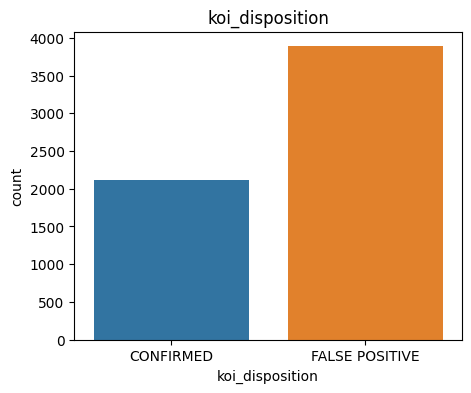

In [ ]:
    # Ratio of 'confirmed' to 'false positive'
    plt.figure(figsize=(5,4))
    plt.title('koi_disposition')
    sns.countplot(x='koi_disposition',  data=train_df);

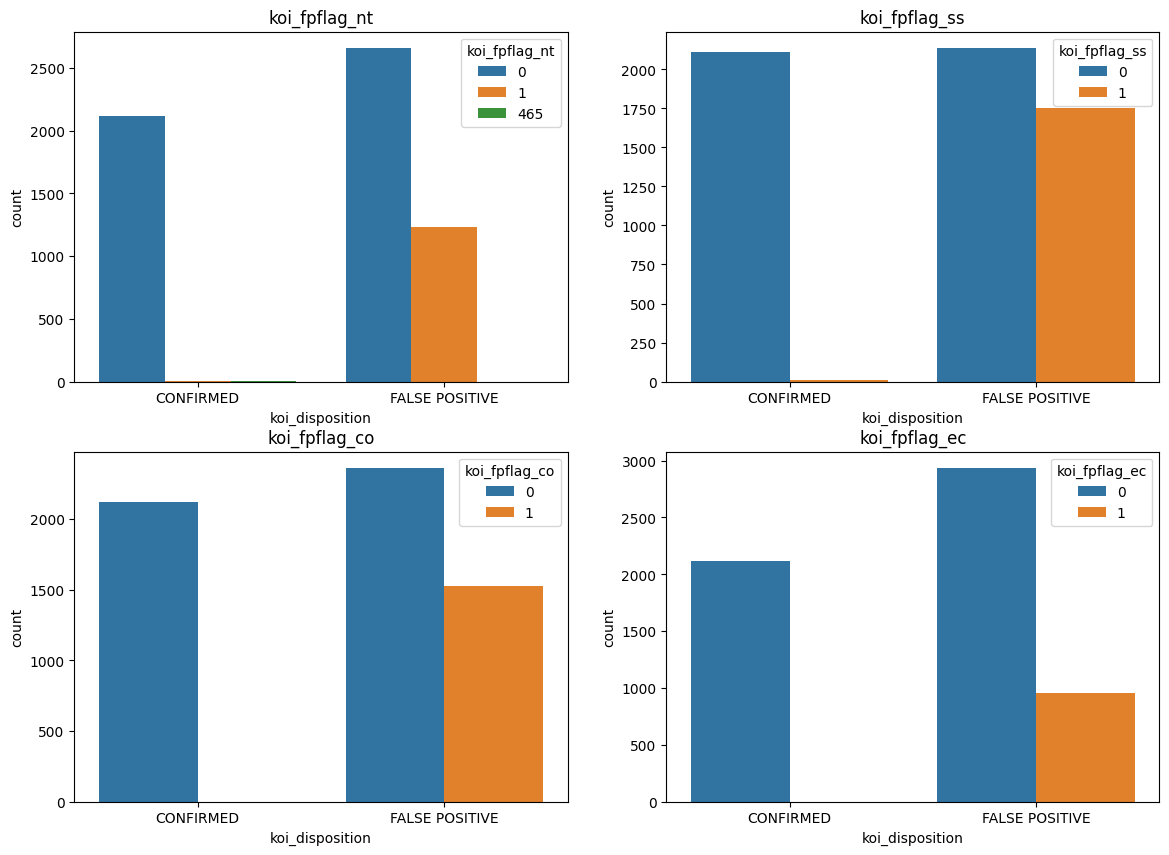

In [ ]:
# Visulisation for the categorical data
# Define the subplot grid
plt.figure(figsize=(14,10))

# Loop over the categorical columns and create countplot
for i, col in enumerate(categorical_col[1:]):
    plt.subplot(2,2,i+1)
    plt.title(col)
    sns.countplot(x='koi_disposition', hue=col, data=train_df)

##### **5.4.2] Feature Correlation:**

###### **5.4.2.1] Chi-Square Test**

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labelEncoder_data = train_df[categorical_col[1:]].copy()
for col in categorical_col[1:]:
    labelEncoder_data[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

P-values for each feature:

koi_fpflag_nt     1.724161e-11
koi_fpflag_ss    2.133447e-204
koi_fpflag_co    3.317143e-183
koi_fpflag_ec    2.935097e-115
dtype: float64





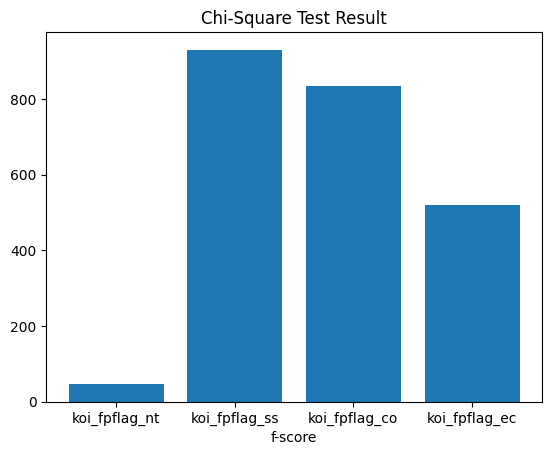

In [ ]:
from sklearn.feature_selection import chi2
from matplotlib import pyplot

chi_score= chi2(train_df[categorical_col[1:]], train_df['koi_disposition'])
fscore_df = pd.Series(chi_score[0])
fscore_df.index = categorical_col[1:]

pvalue_df = pd.Series(chi_score[1])
pvalue_df.index = categorical_col[1:]

print('P-values for each feature:\n')
print(pvalue_df)
print('\n\n')
pyplot.bar(categorical_col[1:], fscore_df)
pyplot.title('Chi-Square Test Result')
pyplot.xlabel('f-score')
pyplot.show()

###### **5.4.2.2] Mutual Information Test:**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

def mutual_info_test(X_train, y_train, k_value, X_test = None, transform_test = False):
 # configure to select all features
    fs = SelectKBest(score_func = mutual_info_classif, k = k_value)
 # learn relationship from training data
    fs.fit(X_train, y_train)
 # transform train input data
    X_train_fs = fs.transform(X_train)
 # transform test input data
    X_test_fs = None
    if transform_test and X_test:
        X_test_fs = fs.transform(X_test)

    return X_train_fs, X_test_fs, fs

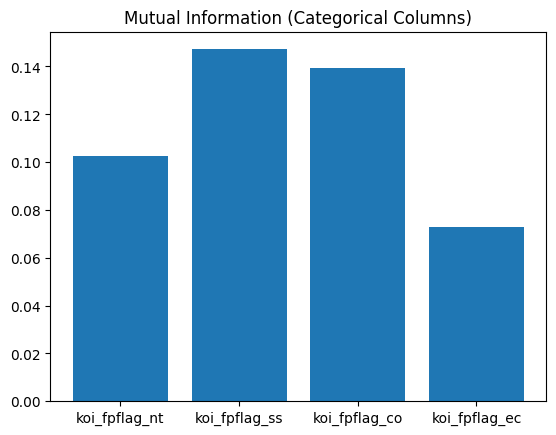

In [ ]:
X_train_fs, _, fs = mutual_info_test(labelEncoder_data, train_df['koi_disposition'], False, 'all')
pyplot.bar(categorical_col[1:], fs.scores_)
pyplot.title("Mutual Information (Categorical Columns)")
pyplot.show()

**One-hot encoder function**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_categorical(df):
    """
    Performs one hot encoding on a given pandas dataframe containing only categorical variables.
    
    Parameters:
    df (pandas.DataFrame): the dataframe to encode
    
    Returns:
    pandas.DataFrame: the encoded dataframe
    """
    # One hot encode categorical columns
    encoder = OneHotEncoder()
    encoded = encoder.fit_transform(df)
    enc_cols = encoder.get_feature_names_out(df.columns)
    encoded_df = pd.DataFrame(encoded.toarray(), columns = enc_cols)
    
    return encoded_df, encoder, enc_cols

#### **5.5] Continuous Data Analysis:**

##### **5.5.1] Normalization:**

Function for normalization using min max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def min_max_norm(data):
    mm_scaler = MinMaxScaler()
    data = mm_scaler.fit_transform(data)
    
    return data, mm_scaler

Function for normalization using standard scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

def standard_norm(data):
    s_scaler = StandardScaler()
    data = s_scaler.fit_transform(data)
    
    return data, s_scaler

In [ ]:
train_df[continuous_col].describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,6008.000000,6008.000000,6008.000000,6008.000000,6.008000e+03,6008.000000,6008.000000,6.008000e+03,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000
mean,51.349103,161.670125,0.740758,5.706713,2.961610e+04,108.660452,1163.222759,1.035081e+04,320.478208,5722.541703,4.308197,1.776435,292.154015,43.732026,14.245582
std,111.728334,60.144314,2.870365,6.786454,8.951586e+04,3403.196414,898.588438,1.939191e+05,870.111435,809.942256,0.433251,6.331825,4.770096,3.573460,1.411679
min,0.241843,120.515914,0.000000,0.296100,8.000000e-01,0.080000,109.000000,3.000000e-02,0.000000,2661.000000,0.250000,0.116000,279.852720,36.577381,6.966000
25%,2.207406,132.532184,0.236525,2.468050,1.867500e+02,1.530000,595.000000,2.953750e+01,15.700000,5343.750000,4.224000,0.839000,288.780852,40.708237,13.438000
50%,8.020063,136.199705,0.615000,3.827530,5.260000e+02,2.740000,969.000000,2.063900e+02,32.650000,5758.000000,4.433000,1.005000,292.313205,43.561171,14.498000
75%,30.100692,169.299457,0.906000,6.271575,4.322500e+03,29.302500,1462.000000,1.481257e+03,154.400000,6106.500000,4.538000,1.434250,295.987588,46.643082,15.292000
max,1064.268096,589.719750,100.196000,138.540000,1.540000e+06,200346.000000,14667.000000,1.094755e+07,9054.700000,15896.000000,5.283000,229.908000,301.720760,52.336010,20.003000


In [ ]:
# Min-max Normalization
mm_norm_data = train_df.copy()
mm_norm_data[continuous_col], mm_scaler = min_max_norm(mm_norm_data[continuous_col])
mm_norm_data[continuous_col].describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000,6008.000000
mean,0.048032,0.087711,0.007393,0.039138,0.019231,0.000542,0.072415,0.000945,0.035394,0.231322,0.806318,0.007226,0.562524,0.454014,0.558379
std,0.105005,0.128184,0.028648,0.049090,0.058127,0.016987,0.061725,0.017713,0.096095,0.061197,0.086082,0.027555,0.218131,0.226762,0.108282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001847,0.025610,0.002361,0.015711,0.000121,0.000007,0.033384,0.000003,0.001734,0.202701,0.789589,0.003146,0.408273,0.262133,0.496433
50%,0.007310,0.033426,0.006138,0.025545,0.000341,0.000013,0.059074,0.000019,0.003606,0.234001,0.831115,0.003869,0.569803,0.443172,0.577740
75%,0.028062,0.103971,0.009042,0.043224,0.002806,0.000146,0.092939,0.000135,0.017052,0.260332,0.851977,0.005737,0.737829,0.638742,0.638644
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Standard Scaler Normalization
s_norm_data = train_df.copy()
s_norm_data[continuous_col], s_scaler = standard_norm(s_norm_data[continuous_col])
s_norm_data[continuous_col].describe()

,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
count,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03,6.008000e+03
mean,6.149837e-17,-1.963217e-16,-4.494112e-17,6.859434e-17,3.547983e-18,4.139314e-18,-1.348234e-16,-1.182661e-18,5.262842e-17,-2.424455e-16,1.348234e-16,-9.461288e-18,-1.501979e-16,-2.610133e-15,-3.725382e-16
std,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00,1.000083e+00
min,-4.574624e-01,-6.843147e-01,-2.580926e-01,-7.973331e-01,-3.308661e-01,-3.190809e-02,-1.173296e+00,-5.338125e-02,-3.683492e-01,-3.780265e+00,-9.367639e+00,-2.622582e-01,-2.579051e+00,-2.002329e+00,-5.157113e+00
25%,-4.398686e-01,-4.845074e-01,-1.756833e-01,-4.772645e-01,-3.287886e-01,-3.148198e-02,-6.324030e-01,-5.322907e-02,-3.503041e-01,-4.677163e-01,-1.943541e-01,-1.480636e-01,-7.072066e-01,-8.462500e-01,-5.721195e-01
50%,-3.878394e-01,-4.235237e-01,-4.381629e-02,-2.769252e-01,-3.249985e-01,-3.112640e-02,-2.161601e-01,-5.231700e-02,-3.308222e-01,4.378244e-02,2.880859e-01,-1.218447e-01,3.337522e-02,-4.781619e-02,1.788220e-01
75%,-1.901951e-01,1.268610e-01,5.757297e-02,8.324061e-02,-2.825835e-01,-2.332059e-02,3.325239e-01,-4.574223e-02,-1.908859e-01,4.740958e-01,5.304600e-01,-5.404655e-02,8.037346e-01,8.147003e-01,7.413196e-01
max,9.066664e+00,7.117635e+00,3.465187e+01,1.957493e+01,1.687421e+01,5.884292e+01,1.502902e+01,5.640554e+01,1.003889e+01,1.256177e+01,2.250162e+00,3.603235e+01,2.005733e+00,2.407947e+00,4.078758e+00


In [ ]:
# Normalizing test data
test_df[continuous_col] = mm_scaler.transform(test_df[continuous_col])

##### **5.5.2] Feature Correlation:**

###### **5.5.2.1] Mutual Information Test:**

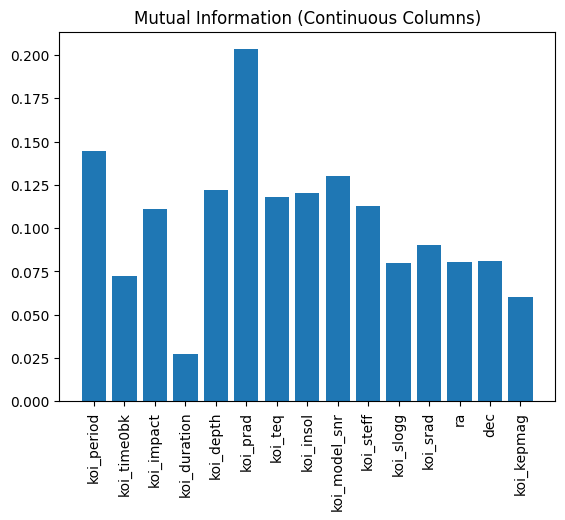

In [ ]:
# function call
X_train_fs, _, fs = mutual_info_test(mm_norm_data[continuous_col], train_df['koi_disposition'], False, 'all')
pyplot.bar(continuous_col, fs.scores_)
plt.xticks(rotation=90)
pyplot.title("Mutual Information (Continuous Columns)")
pyplot.show()

##### **5.5.2] Distribution of continous data:**

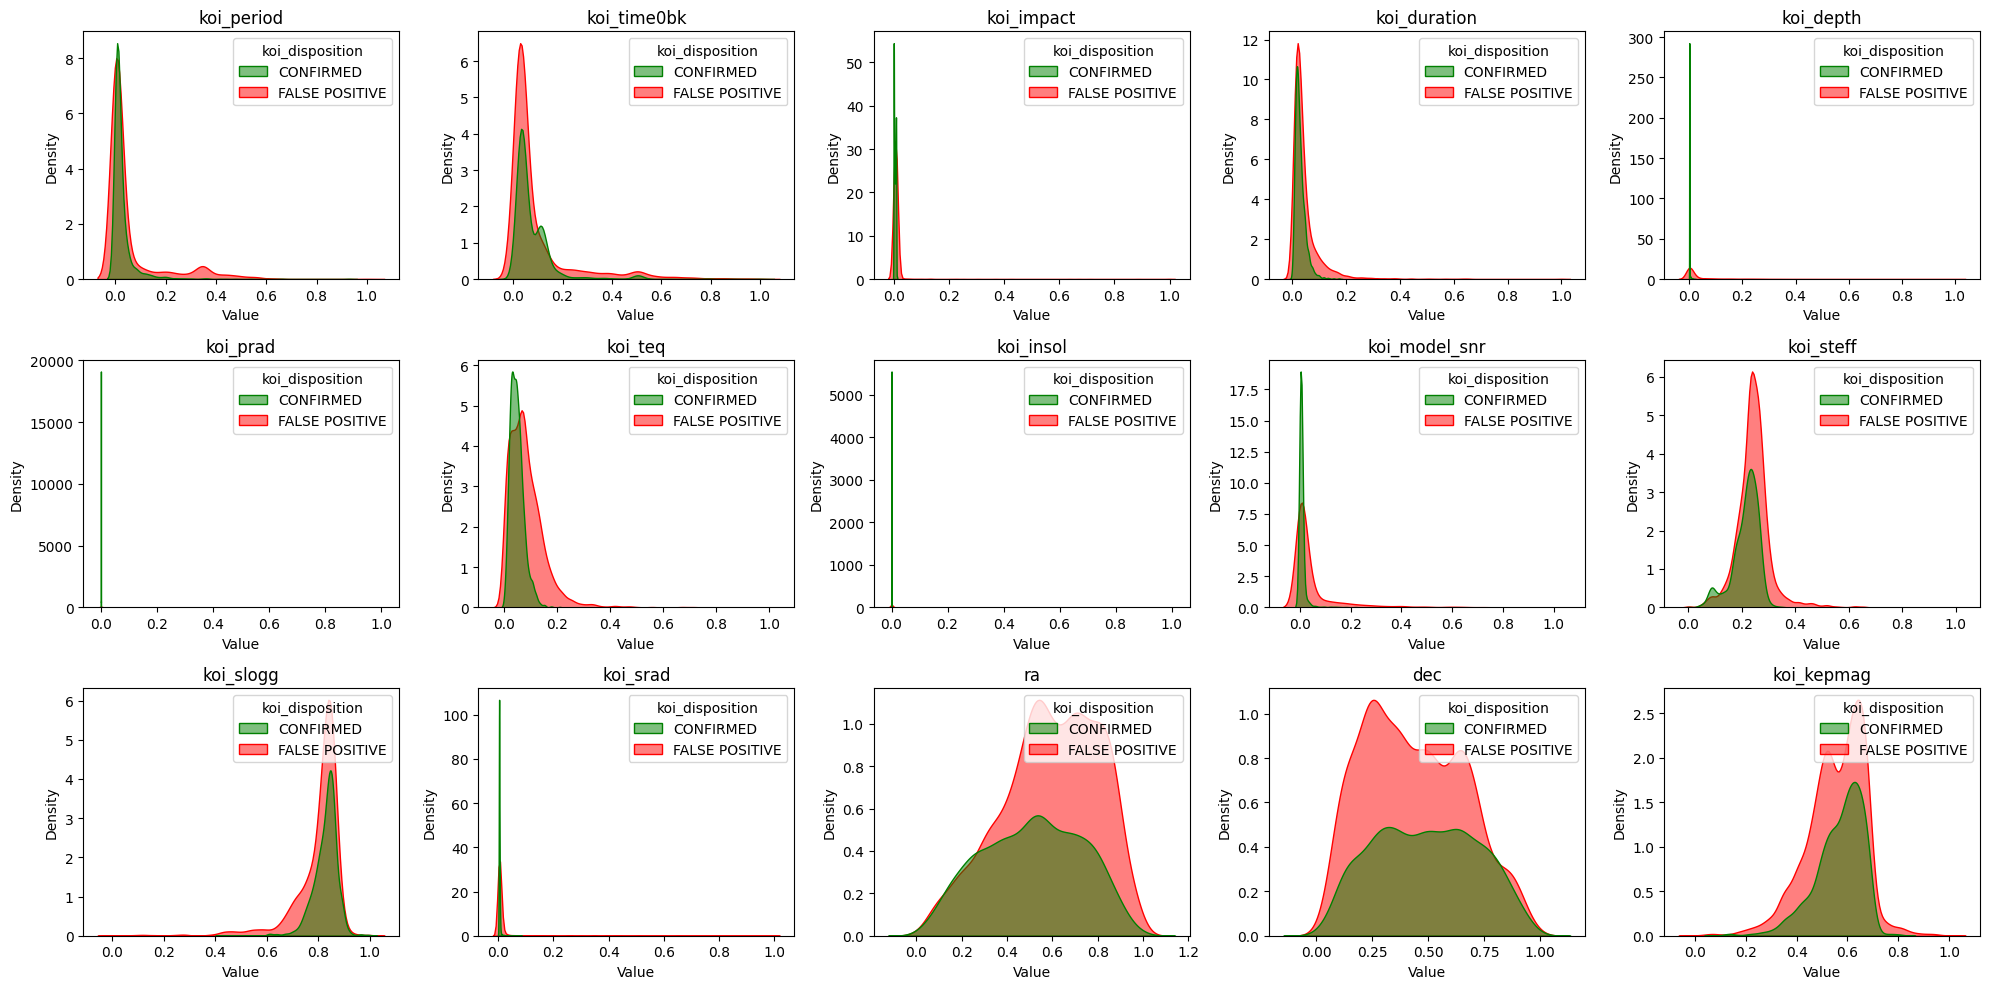

In [ ]:
# Define the colors for the different classes
colors = {'FALSE POSITIVE': 'red', 'CONFIRMED': 'green'}

# Define the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))

# Loop over the continuous columns and create each KDE plot in the corresponding axis
for i, col in enumerate(continuous_col):
    ax = axes[i//5, i%5]
    sns.kdeplot(data=mm_norm_data[[col, 'koi_disposition']], x=col, hue='koi_disposition', fill=True, alpha=0.5, palette=colors, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust the subplot layout and save the figure
fig.tight_layout()
plt.show()

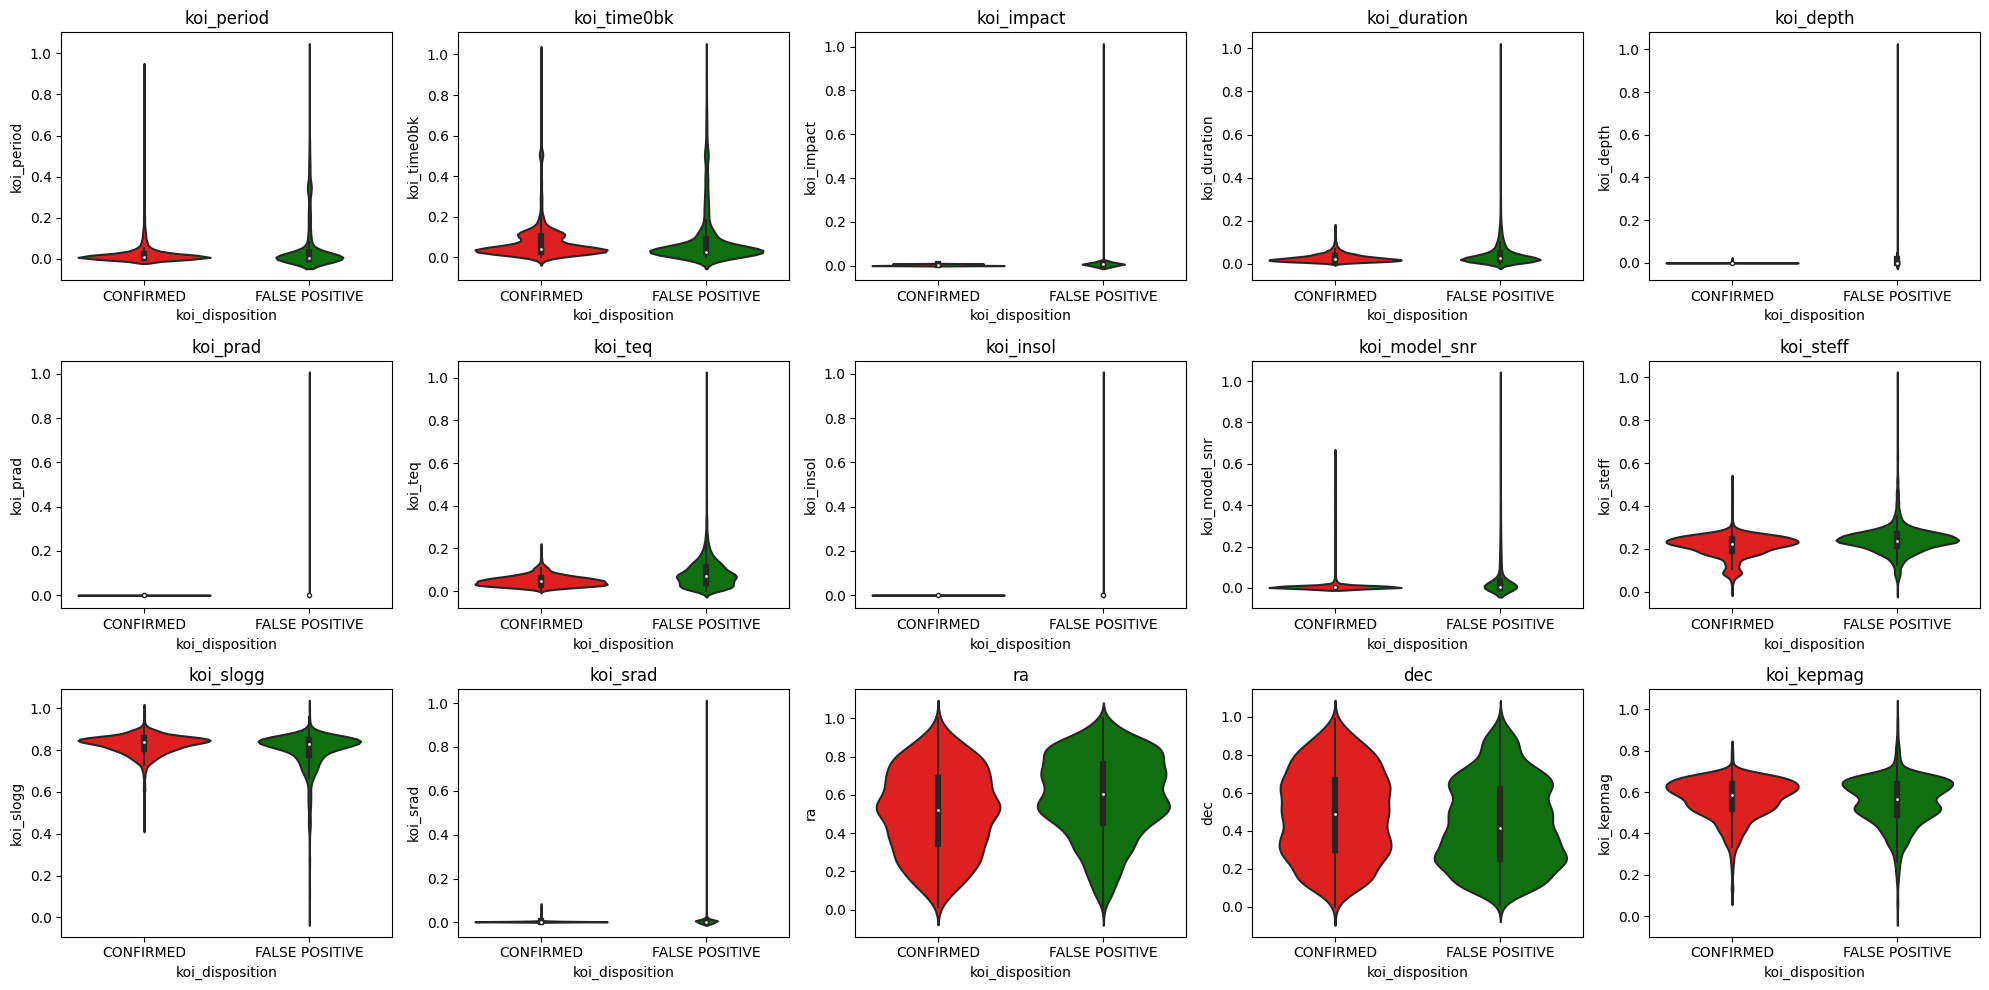

In [ ]:
# Define the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))

# Loop over the continuous columns and create each KDE plot in the corresponding axis
for i, col in enumerate(continuous_col):
    ax = axes[i//5, i%5]
    sns.violinplot(x=mm_norm_data['koi_disposition'], y=mm_norm_data[col], palette = ['red', 'green'], ax=ax)
    ax.set_xlabel('koi_disposition')
    ax.set_ylabel(col)
    ax.set_title(col)

# Adjust the subplot layout and save the figure
fig.tight_layout()
plt.show()

##### **5.5.3] Outliers:**

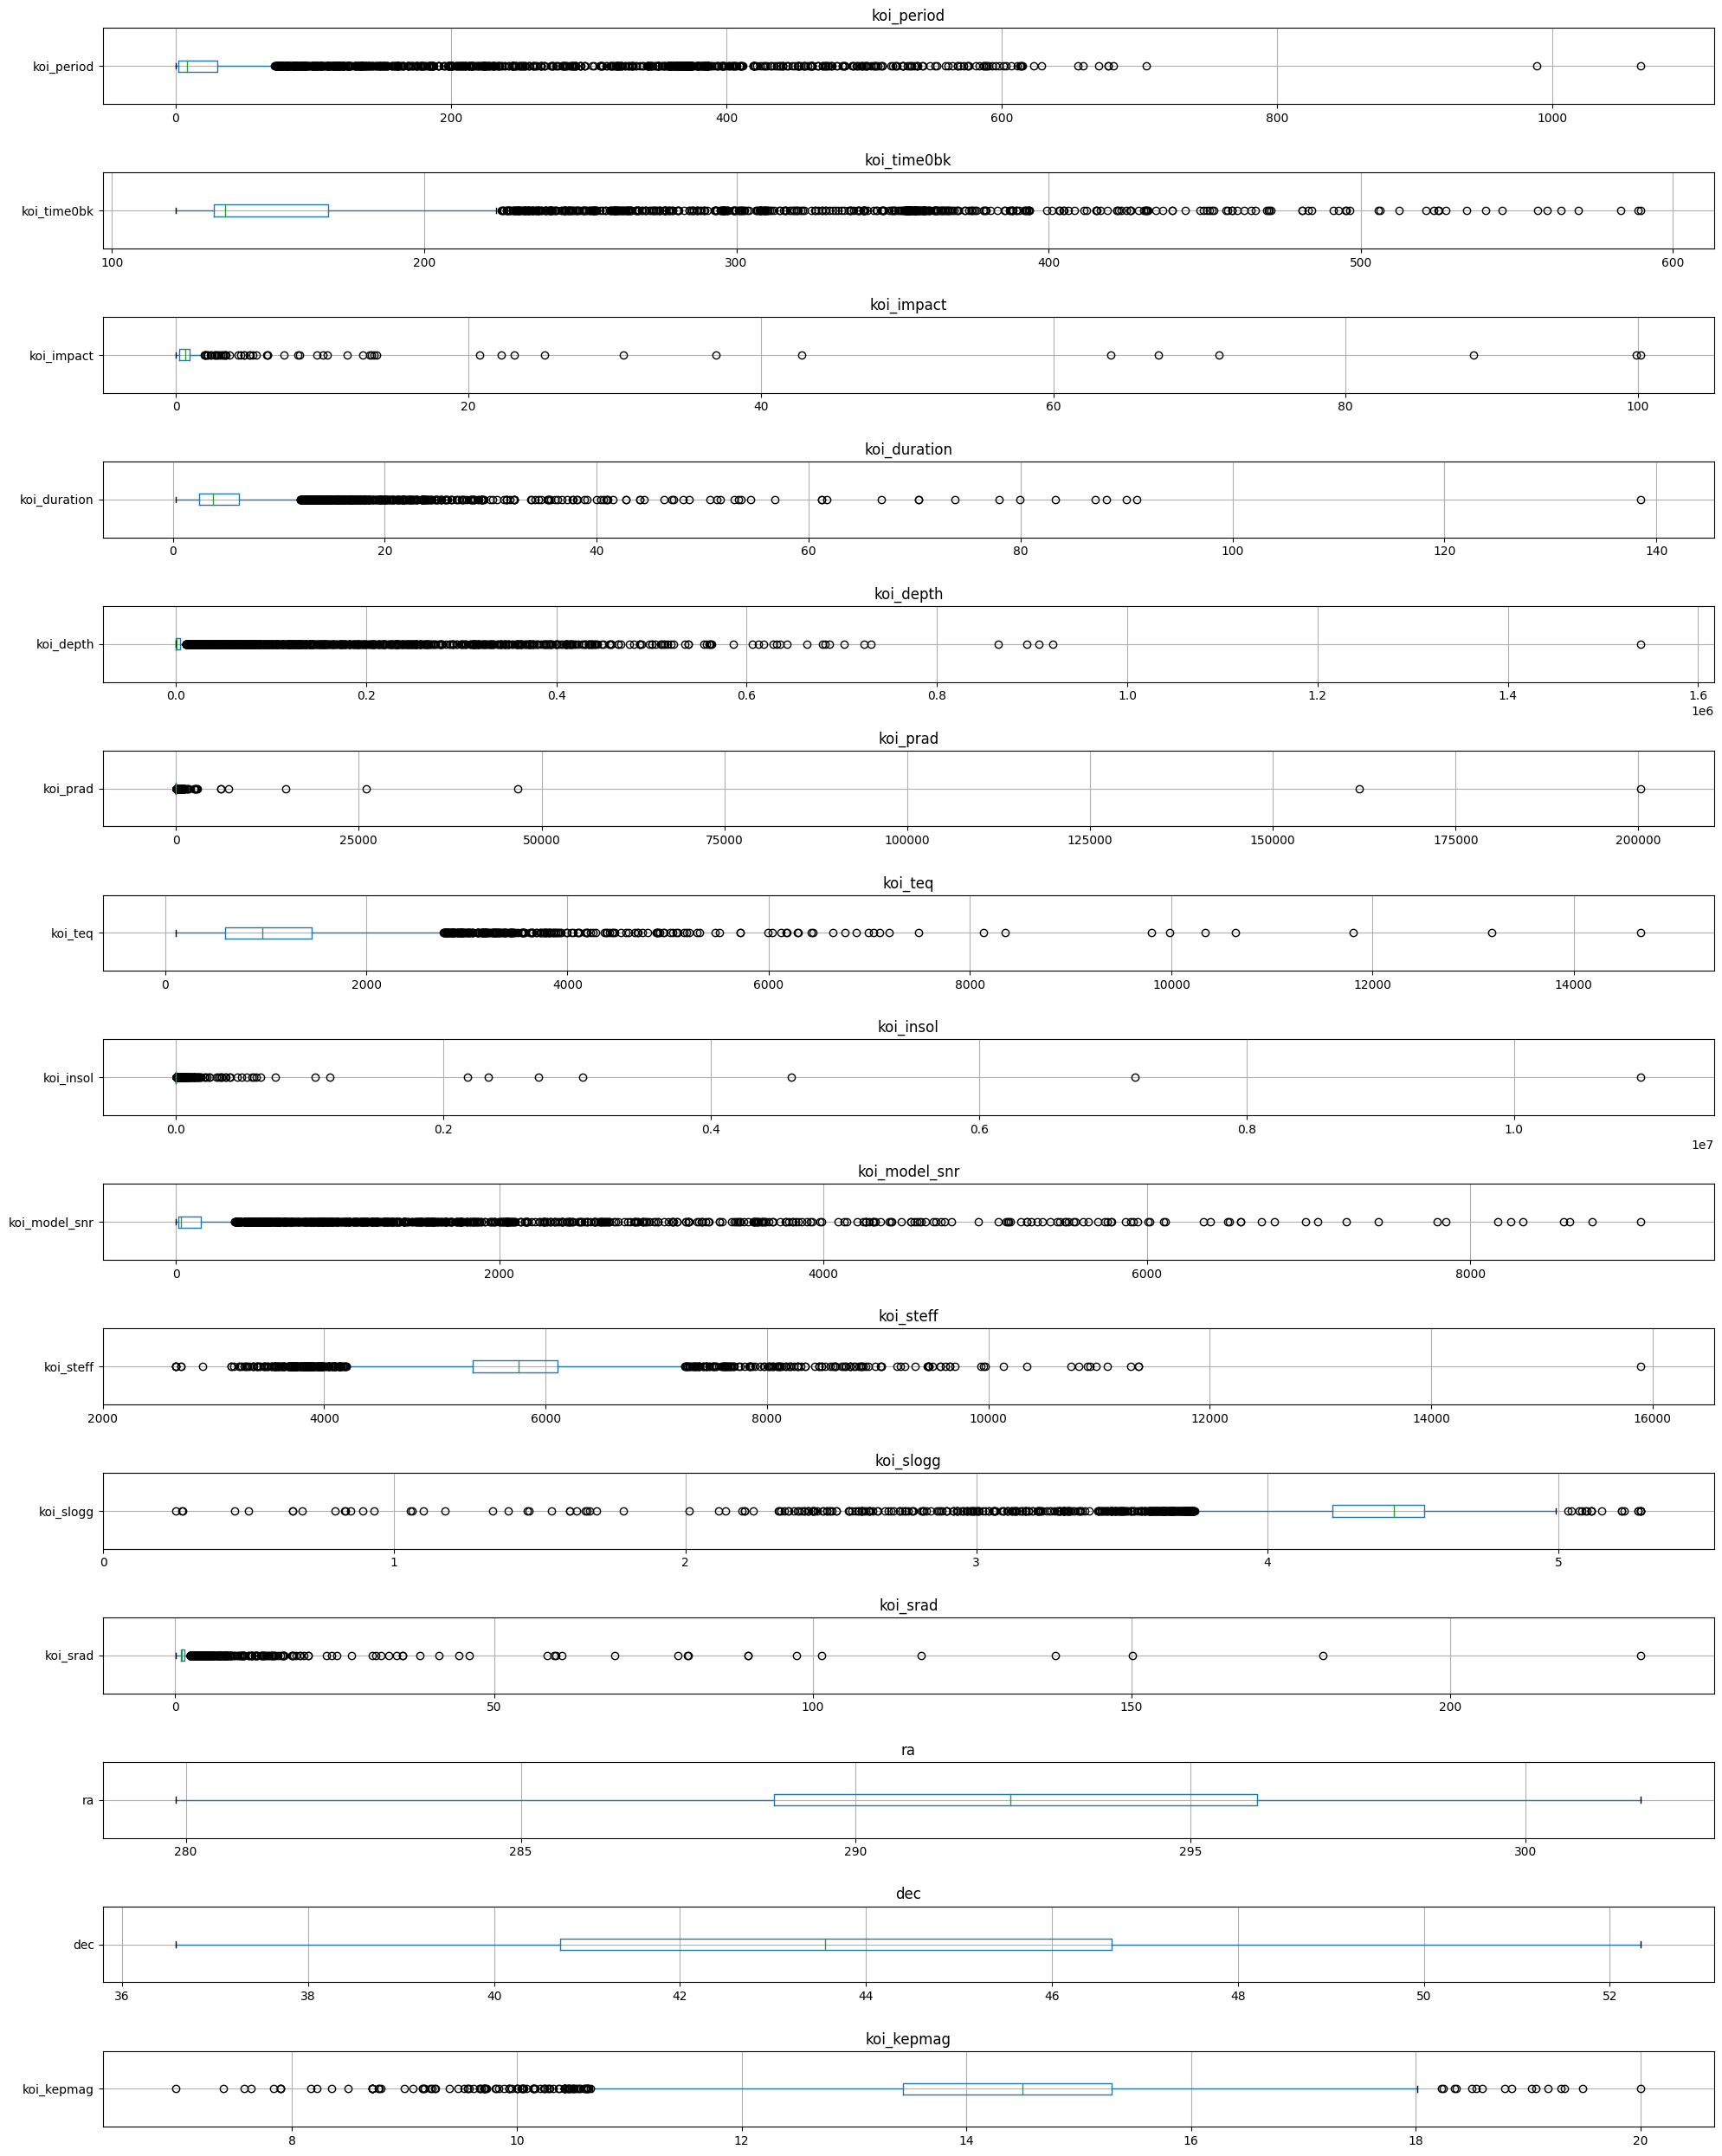

In [ ]:
num_figs = 1
rows_per_fig = 15

for i in range(num_figs):
    start_idx = i*rows_per_fig
    end_idx = (i+1)*rows_per_fig

    fig, axes = plt.subplots(nrows=rows_per_fig, ncols=1, figsize=(20, 25))
    axes = axes.flatten()

    for j, col in enumerate(continuous_col[start_idx:end_idx]):
        train_df.boxplot(col, ax=axes[j], vert=False)
        axes[j].set_title(col)

    fig.tight_layout()
    plt.show()

In [ ]:
# Number of outliers in each continuous feature
for col in continuous_col:
    q1 = np.percentile(train_df[col], 25)
    q3 = np.percentile(train_df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)][col]
    print(f"Column '{col}' has '{len(outliers)}' outliers")


Column 'koi_period' has '934' outliers
Column 'koi_time0bk' has '558' outliers
Column 'koi_impact' has '56' outliers
Column 'koi_duration' has '539' outliers
Column 'koi_depth' has '1278' outliers
Column 'koi_prad' has '676' outliers
Column 'koi_teq' has '261' outliers
Column 'koi_insol' has '946' outliers
Column 'koi_model_snr' has '893' outliers
Column 'koi_steff' has '402' outliers
Column 'koi_slogg' has '431' outliers
Column 'koi_srad' has '509' outliers
Column 'ra' has '0' outliers
Column 'dec' has '0' outliers
Column 'koi_kepmag' has '122' outliers


In [ ]:
# Function for removing outliers
def remove_outliers(data):
    outliers_idx = []
    for col in continuous_col:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        outliers_idx.append(outliers.index.values)
        
    # Concatenating all the outlier indices into one array
    all_outliers = np.concatenate(outliers_idx)
    # Finding outliers that are common for more than the threshold
    unique, counts = np.unique(all_outliers, return_counts=True)
    remove_idxs = list(unique[counts > 5])
    
    data.drop(remove_idxs, inplace = True)
    return data

In [ ]:
train_df_no_outliers = train_df.copy()
train_df_no_outliers = remove_outliers(train_df_no_outliers)
train_df_no_outliers

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,3.773599,134.070130,0.0000,2.72820,176.0,1.29,1270.0,614.52,25.6,6224.0,4.404,0.969,294.76990,39.398510,14.207
1,CONFIRMED,0,0,0,0,0.824000,131.804210,0.7697,0.85500,183.0,0.42,746.0,73.09,12.3,3396.0,4.991,0.280,287.26215,42.032310,15.896
3,CONFIRMED,0,0,0,0,6.933652,137.073750,0.9040,4.60800,120.0,1.70,1104.0,351.27,20.1,5861.0,4.212,1.304,294.17108,40.055168,14.042
4,FALSE POSITIVE,0,1,0,0,30.695331,155.720769,1.0410,5.94855,88800.0,69.40,737.0,69.65,7846.3,6335.0,4.171,1.286,294.47830,46.863811,12.508
5,FALSE POSITIVE,0,1,0,0,2.377955,132.557333,1.2980,2.43290,4390.0,92.61,2965.0,18261.57,257.5,9565.0,4.088,2.286,298.27737,48.640820,11.639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,FALSE POSITIVE,0,1,1,1,8.097058,170.810440,0.9590,5.69900,681.0,4.83,1203.0,495.31,76.4,6573.0,4.200,1.455,293.44879,37.722641,13.110
6004,FALSE POSITIVE,1,0,0,0,1.787529,132.464600,0.0640,5.31500,62.9,5.86,3868.0,52997.01,16.0,6286.0,3.056,7.342,295.43771,40.120998,11.800
6005,FALSE POSITIVE,0,0,0,0,10.911049,142.527140,0.9761,7.03300,402.0,2.36,786.0,90.07,28.3,5903.0,4.546,0.864,290.89407,38.435032,15.172
6006,CONFIRMED,0,0,0,0,3.886889,132.495500,0.0350,3.68300,58.3,1.29,1574.0,1448.04,20.8,6167.0,4.037,1.689,293.03775,46.277519,13.294


#### **5.6] Feature Selection:**

In [ ]:
X = pd.concat([labelEncoder_data, mm_norm_data[continuous_col]], axis=1)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,0,0,0,0,0.003319,0.028888,0.000000,0.017593,0.000114,0.000006,0.079750,0.000056,0.002827,0.269210,0.825353,0.003712,0.682145,0.179021,0.555419
1,0,0,0,0,0.000547,0.024058,0.007682,0.004043,0.000118,0.000002,0.043756,0.000007,0.001358,0.055535,0.941983,0.000714,0.338825,0.346155,0.684974
2,0,1,0,0,0.000345,0.024584,0.012915,0.007110,0.001311,0.000791,0.243303,0.003857,0.050559,0.178391,0.608186,0.017629,0.776794,0.433456,0.530797
3,0,0,0,0,0.006289,0.035289,0.009022,0.031191,0.000077,0.000008,0.068347,0.000032,0.002220,0.241783,0.787204,0.005170,0.654762,0.220691,0.542763
4,0,1,0,0,0.028621,0.075031,0.010390,0.040888,0.057662,0.000346,0.043138,0.000006,0.866544,0.277597,0.779058,0.005092,0.668811,0.652749,0.425098


In [ ]:
# Mutual information scores for all the features
X_train_fs, _, fs = mutual_info_test(X, train_df['koi_disposition'], False, 'all')
sorted_mi_scores = pd.Series(fs.scores_, index=X.columns, name = "MI Scores").sort_values(ascending=False)
print("Mutual Information Scores:\n")
print(sorted_mi_scores)

Mutual Information Scores:

koi_prad         0.210241
koi_fpflag_ss    0.151314
koi_period       0.144508
koi_model_snr    0.134610
koi_fpflag_co    0.130130
koi_depth        0.120498
koi_insol        0.118769
koi_teq          0.115164
koi_steff        0.114862
koi_impact       0.112064
koi_fpflag_nt    0.096977
koi_srad         0.093749
koi_slogg        0.082520
dec              0.081468
ra               0.080407
koi_time0bk      0.072537
koi_fpflag_ec    0.071207
koi_kepmag       0.061969
koi_duration     0.028442
Name: MI Scores, dtype: float64


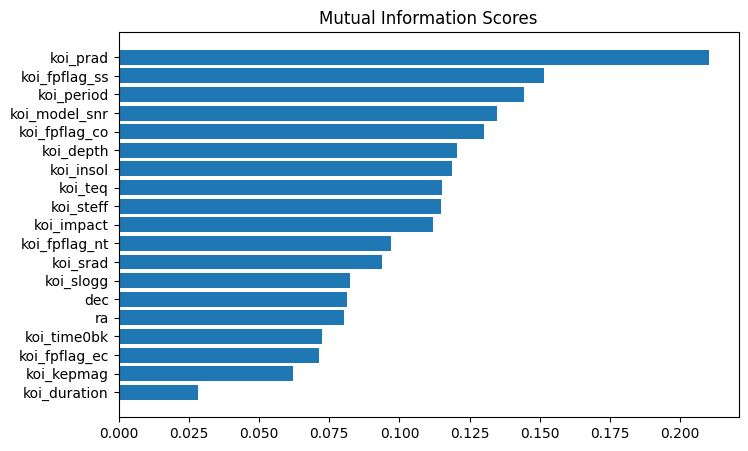

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(sorted_mi_scores)

In [ ]:
# Select the top 15 features with the highest mutual information values
top_features = sorted_mi_scores.index[:15].values
print(top_features)

['koi_prad' 'koi_fpflag_ss' 'koi_period' 'koi_model_snr' 'koi_fpflag_co'
 'koi_depth' 'koi_insol' 'koi_teq' 'koi_steff' 'koi_impact'
 'koi_fpflag_nt' 'koi_srad' 'koi_slogg' 'dec' 'ra']


In [ ]:
# Separating the final continuous and categorical columns
final_cat_cols = []
for feature in top_features:
    if feature in categorical_col:
        final_cat_cols.append(feature)
final_cont_cols = [x for x in top_features if x not in final_cat_cols]
print(f"Final Categorical Columns: {final_cat_cols}")
print(f"Final Continuous Columns: {final_cont_cols}")

Final Categorical Columns: ['koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_nt']
Final Continuous Columns: ['koi_prad', 'koi_period', 'koi_model_snr', 'koi_depth', 'koi_insol', 'koi_teq', 'koi_steff', 'koi_impact', 'koi_srad', 'koi_slogg', 'dec', 'ra']


#### **5.7] Prepare Train & Test Data:**

In [ ]:
X_data_cont = X[final_cont_cols]
X_data_cat, encoder, enc_cols = one_hot_encode_categorical(X[final_cat_cols])
X_data = pd.concat([X_data_cont, X_data_cat], axis=1)

Y_data = le.fit_transform(train_df['koi_disposition'])

XY_data = pd.concat([X_data, pd.DataFrame(Y_data, columns = ['target'])], axis=1)
train, valid = split_data(XY_data, 0.2)

X_train_cont = train[final_cont_cols]
X_train_cat = train[X_data_cat.columns]
X_train = pd.concat([X_train_cont, X_train_cat], axis=1)

Y_train = train['target']

X_valid_cont = valid[final_cont_cols]
X_valid_cat = valid[X_data_cat.columns]
X_valid = pd.concat([X_valid_cont, X_valid_cat], axis=1)

Y_valid = valid['target']

X_test_cont = test_df[final_cont_cols]
X_test_cat = encoder.transform(test_df[final_cat_cols])
X_test_cat = pd.DataFrame(X_test_cat.toarray(), columns = enc_cols)
X_test = pd.concat([X_test_cont, X_test_cat], axis=1)

Y_test = le.fit_transform(test_df['koi_disposition'])
Y_test = pd.Series(Y_test, name = 'target')

#### **5.8] PCA:**

In [ ]:
from sklearn.decomposition import PCA

def pca_plot(x_data, y_data):
    
    # Find top 2 principal componets with PCA
    pca = PCA(n_components = 2)
    pca.fit(x_data)
    
    #Project the data into a two dimensional space
    P = pca.transform(x_data)
    
    print('Total Variance Capture: ', sum(pca.explained_variance_ratio_)*100)
    
    outcomes = [0, 1]
    colors = ['red', 'green']
    for outcome, color in zip(outcomes,colors):
        indicesToKeep = y_data == outcome
        plt.scatter(P[indicesToKeep, 0], P[indicesToKeep, 1], c = color, s = 0.5, label=outcome)
        plt.title("Principal Component Analysis")
        plt.legend()

Total Variance Capture:  71.33533301622407


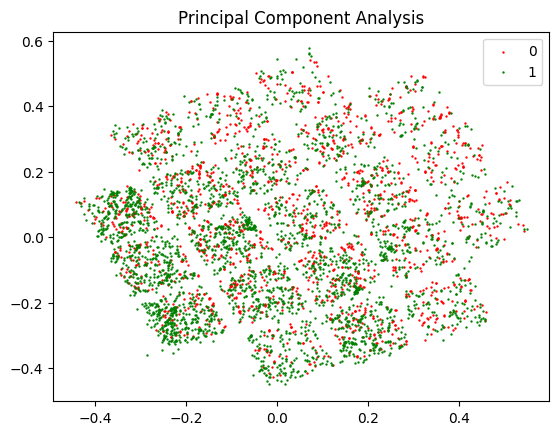

In [ ]:
pca_plot(X_train[final_cont_cols], Y_train)

### ***6] Model Building and Evaluation:***

#### 6.0] Evaluation Function

In [ ]:
def conf_mat_plot(cf_matrix):
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    cmap = sns.cubehelix_palette(as_cmap=True)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap=cmap)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(Y_valid, Y_val_pred, model_name = None, save_in_df = False):
    
    # Calculate confusion matrix and scores
    cm = confusion_matrix(Y_valid, Y_val_pred)
    accuracy_1 = accuracy_score(Y_valid, Y_val_pred)
    accuracy = round(accuracy_score(Y_valid, Y_val_pred),2)*100
    precision = precision_score(Y_valid, Y_val_pred)
    recall = recall_score(Y_valid, Y_val_pred)
    Error_rate = 1-accuracy_1
    f1 = f1_score(Y_valid, Y_val_pred)
    classificationReport = classification_report(Y_valid, Y_val_pred)
    # Print the results
    print(f"Confusion Matrix:\n")
    conf_mat_plot(cm)
    print(f"Accuracy Score : {accuracy}%")
    print(f"Precision Score: {round(precision,2)}")
    print(f"Recall Score: {round(recall,2)}")
    print(f"F1 Score: {round(f1,2)}")
    print(f"Error rate: {round(Error_rate,2)}")
    print("\nClassification Report:\n", classificationReport)

    if save_in_df:
      new_data = {'Model': model_name, 'Accuracy': accuracy, 'Precision': round(precision,2), 'Recall': round(recall,2), 'F1 Score': round(f1,2), 'Error Rate': round(Error_rate,2)}
      global eval_df
      eval_df = eval_df.append(new_data, ignore_index=True)


In [ ]:
# Dataframe to compare the evaluation metrics of all the methods
eval_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Error Rate'])

#### **6.1] Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the logistic regression model
lr = LogisticRegression()

# Define the hyperparameter grid to search

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']}

# Define the GridSearchCV object
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_lr.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search_lr.best_params_)

Best hyperparameters:  {'C': 78.47599703514607, 'penalty': 'l1', 'solver': 'liblinear'}


Confusion Matrix:

Accuracy Score : 97.0%
Precision Score: 0.99
Recall Score: 0.97
F1 Score: 0.98
Error rate: 0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       433
           1       0.99      0.97      0.98       769

    accuracy                           0.97      1202
   macro avg       0.97      0.98      0.97      1202
weighted avg       0.98      0.97      0.97      1202



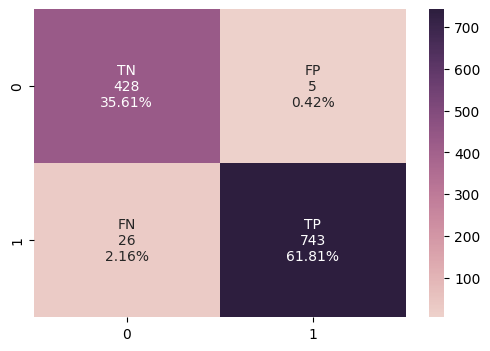

In [ ]:
# Prediction on the validation set
Y_val_pred = grid_search_lr.predict(X_valid)
#Report on validation set
evaluate_model(Y_valid, Y_val_pred) 

Confusion Matrix:

Accuracy Score : 98.0%
Precision Score: 0.99
Recall Score: 0.98
F1 Score: 0.98
Error rate: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       552
           1       0.99      0.98      0.98       951

    accuracy                           0.98      1503
   macro avg       0.98      0.98      0.98      1503
weighted avg       0.98      0.98      0.98      1503



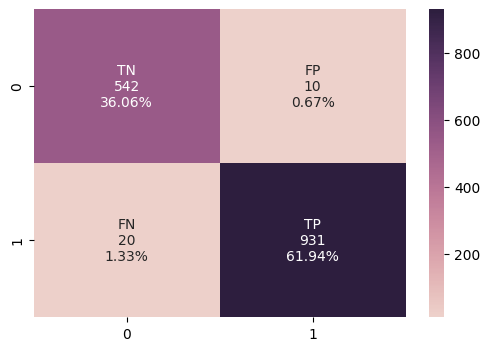

In [ ]:
# Prediction on the test set
Y_pred = grid_search_lr.predict(X_test)
# Report on test set
evaluate_model(Y_test, Y_pred, "Logistic Regression", save_in_df = True) 

#### **6.2] Support Vector Machine:**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_model = SVC()
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']} 
grid_svm = GridSearchCV(SVC(), param_grid, refit=True)

grid_svm.fit(X_train,Y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_svm.best_params_)

print("Accuracy of the best model on Validation data: ", grid_svm.best_estimator_.score(X_valid, Y_valid))
print("Accuracy of the best model on testing data: ", grid_svm.best_estimator_.score(X_test, Y_test))

Best hyperparameters:  {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Accuracy of the best model on Validation data:  0.9725457570715474
Accuracy of the best model on testing data:  0.980705256154358


Confusion Matrix:

Accuracy Score : 97.0%
Precision Score: 1.0
Recall Score: 0.96
F1 Score: 0.98
Error rate: 0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       433
           1       1.00      0.96      0.98       769

    accuracy                           0.97      1202
   macro avg       0.97      0.98      0.97      1202
weighted avg       0.97      0.97      0.97      1202



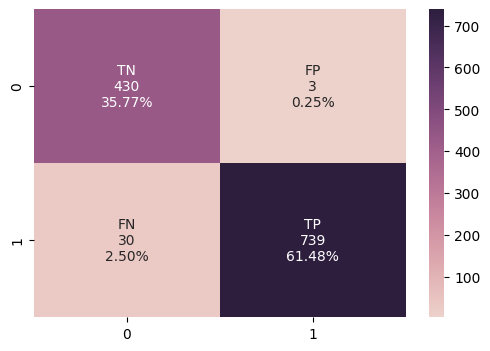

In [ ]:
# Prediction on the validation set
Y_val_pred = grid_svm.predict(X_valid)
#Report on validation set
evaluate_model(Y_valid, Y_val_pred)

Confusion Matrix:

Accuracy Score : 98.0%
Precision Score: 0.99
Recall Score: 0.98
F1 Score: 0.98
Error rate: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       552
           1       0.99      0.98      0.98       951

    accuracy                           0.98      1503
   macro avg       0.98      0.98      0.98      1503
weighted avg       0.98      0.98      0.98      1503



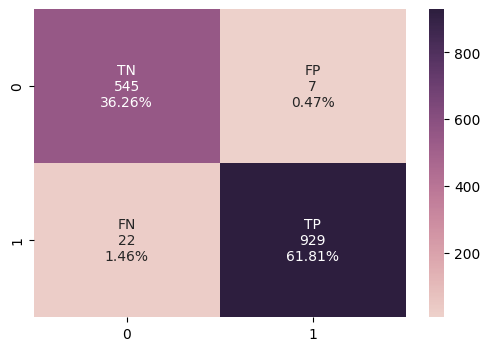

In [ ]:
# Prediction on the test set
Y_pred = grid_svm.predict(X_test)
# Report on test set
evaluate_model(Y_test, Y_pred, "Support Vector Machine", save_in_df = True) 

#### **6.3] Naïve Bayes:**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

Confusion Matrix:

Accuracy Score : 97.0%
Precision Score: 0.99
Recall Score: 0.96
F1 Score: 0.98
Error rate: 0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       433
           1       0.99      0.96      0.98       769

    accuracy                           0.97      1202
   macro avg       0.97      0.98      0.97      1202
weighted avg       0.97      0.97      0.97      1202



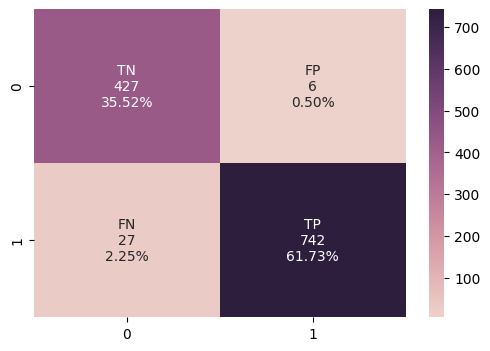

In [ ]:
# Prediction on the validation set
Y_val_pred = gnb.predict(X_valid)
# Report on validation set
evaluate_model(Y_valid, Y_val_pred)

Confusion Matrix:

Accuracy Score : 98.0%
Precision Score: 0.99
Recall Score: 0.98
F1 Score: 0.98
Error rate: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       552
           1       0.99      0.98      0.98       951

    accuracy                           0.98      1503
   macro avg       0.98      0.98      0.98      1503
weighted avg       0.98      0.98      0.98      1503



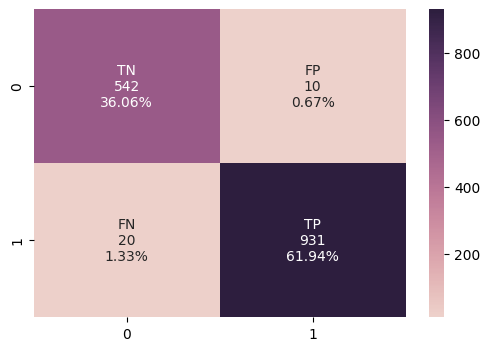

In [ ]:
# Prediction on the test set
Y_pred = gnb.predict(X_test)
# Report on test set
evaluate_model(Y_test, Y_pred, "Naïve Bayes", save_in_df = True) 

#### **6.4] K-nearest neighbor:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [1,3,5,7, 20, 30, 38, 40, 50], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, Y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search_knn.best_params_)

Best hyperparameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Confusion Matrix:

Accuracy Score : 97.0%
Precision Score: 0.99
Recall Score: 0.96
F1 Score: 0.98
Error rate: 0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       433
           1       0.99      0.96      0.98       769

    accuracy                           0.97      1202
   macro avg       0.97      0.98      0.97      1202
weighted avg       0.97      0.97      0.97      1202



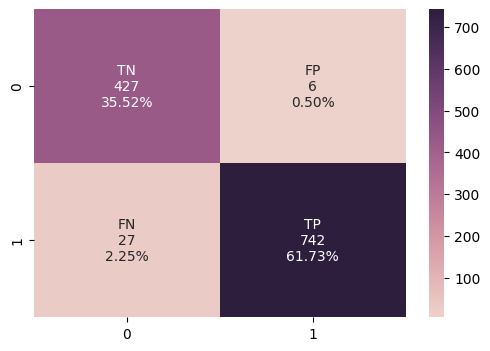

In [ ]:
# Prediction on the validation set
Y_val_pred = grid_search_knn.predict(X_valid)
#Report on validation set
evaluate_model(Y_valid, Y_val_pred)

Confusion Matrix:

Accuracy Score : 98.0%
Precision Score: 0.99
Recall Score: 0.97
F1 Score: 0.98
Error rate: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       552
           1       0.99      0.97      0.98       951

    accuracy                           0.98      1503
   macro avg       0.97      0.98      0.98      1503
weighted avg       0.98      0.98      0.98      1503



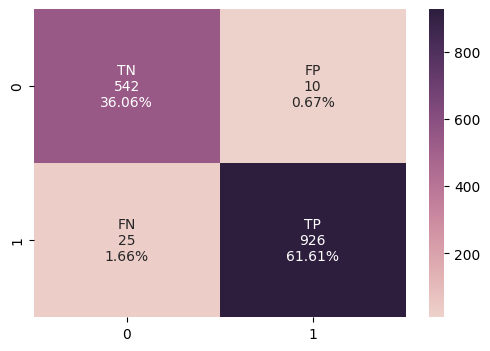

In [ ]:
# Prediction on the test set
Y_pred = grid_search_knn.predict(X_test)
# Report on test set
evaluate_model(Y_test, Y_pred, "K-Nearest Neighbor", save_in_df = True) 

#### **6.5] Decision Trees:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

Confusion Matrix:

Accuracy Score : 97.0%
Precision Score: 0.97
Recall Score: 0.99
F1 Score: 0.98
Error rate: 0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       433
           1       0.97      0.99      0.98       769

    accuracy                           0.97      1202
   macro avg       0.97      0.97      0.97      1202
weighted avg       0.97      0.97      0.97      1202



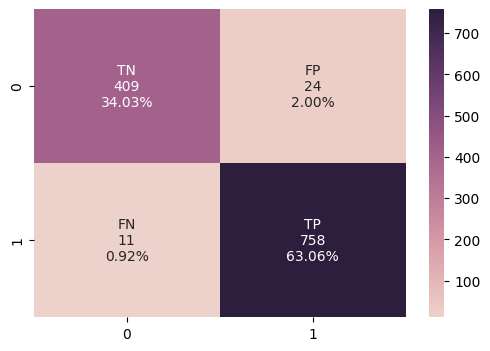

In [ ]:
# Prediction on the validation set
Y_val_pred = dtc.predict(X_valid)
#Report on validation set
evaluate_model(Y_valid, Y_val_pred)

Confusion Matrix:

Accuracy Score : 97.0%
Precision Score: 0.97
Recall Score: 0.98
F1 Score: 0.98
Error rate: 0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       552
           1       0.97      0.98      0.98       951

    accuracy                           0.97      1503
   macro avg       0.97      0.97      0.97      1503
weighted avg       0.97      0.97      0.97      1503



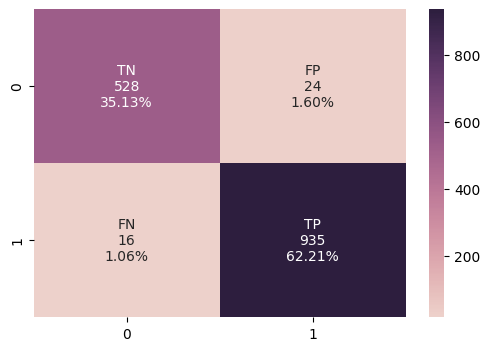

In [ ]:
# Prediction on the test set
Y_pred = dtc.predict(X_test)
# Report on test set
evaluate_model(Y_test, Y_pred, "Decision Tree", save_in_df = True) 

#### **6.6] Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameter grid to search
param_distributions = {
    'n_estimators': np.arange(100, 1000, 50),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2', None]
}

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, Y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", random_search.best_params_)



Best hyperparameters:  {'n_estimators': 450, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 10}


Confusion Matrix:

Accuracy Score : 98.0%
Precision Score: 0.98
Recall Score: 0.98
F1 Score: 0.98
Error rate: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       433
           1       0.98      0.98      0.98       769

    accuracy                           0.98      1202
   macro avg       0.98      0.98      0.98      1202
weighted avg       0.98      0.98      0.98      1202



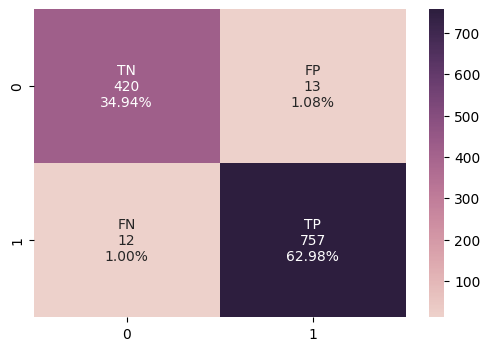

In [ ]:
# Prediction on the validation set
Y_val_pred = random_search.predict(X_valid)
#Report on validation set
evaluate_model(Y_valid, Y_val_pred)

Confusion Matrix:

Accuracy Score : 98.0%
Precision Score: 0.98
Recall Score: 0.99
F1 Score: 0.99
Error rate: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       552
           1       0.98      0.99      0.99       951

    accuracy                           0.98      1503
   macro avg       0.98      0.98      0.98      1503
weighted avg       0.98      0.98      0.98      1503



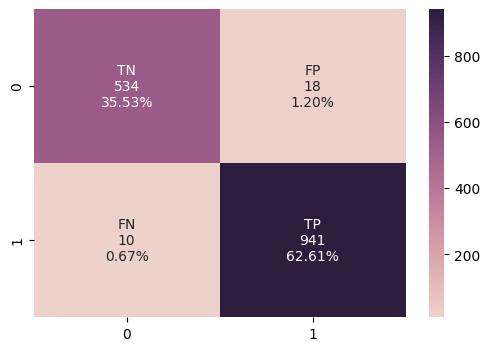

In [ ]:
# Prediction on the test set
Y_pred = random_search.predict(X_test)
# Report on test set
evaluate_model(Y_test, Y_pred, "Random Forest", save_in_df = True) 

#### **6.7] Neural Network:**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Define the model architecture
nn_model = Sequential()
nn_model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, Y_train, epochs=50, validation_data=(X_valid, Y_valid))

Epoch 1/50
151/151 [==============================] - 2s 4ms/step - loss: 0.1744 - accuracy: 0.9474 - val_loss: 0.1142 - val_accuracy: 0.9684
Epoch 2/50
151/151 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9669 - val_loss: 0.1152 - val_accuracy: 0.9684
Epoch 3/50
151/151 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.9682 - val_loss: 0.1114 - val_accuracy: 0.9692
Epoch 4/50
151/151 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.9682 - val_loss: 0.1116 - val_accuracy: 0.9725
Epoch 5/50
151/151 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9696 - val_loss: 0.1021 - val_accuracy: 0.9717
Epoch 6/50
151/151 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9692 - val_loss: 0.1151 - val_accuracy: 0.9692
Epoch 7/50
151/151 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9696 - val_loss: 0.1141 - val_accuracy: 0.9709
Epoch 

38/38 [==============================] - 0s 1ms/step
Confusion Matrix:

Accuracy Score : 97.0%
Precision Score: 0.99
Recall Score: 0.97
F1 Score: 0.98
Error rate: 0.03

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       433
           1       0.99      0.97      0.98       769

    accuracy                           0.97      1202
   macro avg       0.97      0.98      0.97      1202
weighted avg       0.98      0.97      0.97      1202



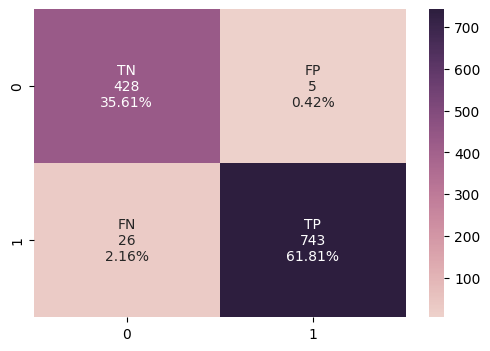

In [ ]:
# Prediction on the validation set
Y_val_pred = nn_model.predict(X_valid)
# Convert predicted probabilities to class labels (0 or 1)
Y_val_pred = (Y_val_pred > 0.5).astype(int)
#Report on validation set
evaluate_model(Y_valid, Y_val_pred)

47/47 [==============================] - 0s 1ms/step
Confusion Matrix:

Accuracy Score : 98.0%
Precision Score: 0.99
Recall Score: 0.98
F1 Score: 0.99
Error rate: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       552
           1       0.99      0.98      0.99       951

    accuracy                           0.98      1503
   macro avg       0.98      0.98      0.98      1503
weighted avg       0.98      0.98      0.98      1503



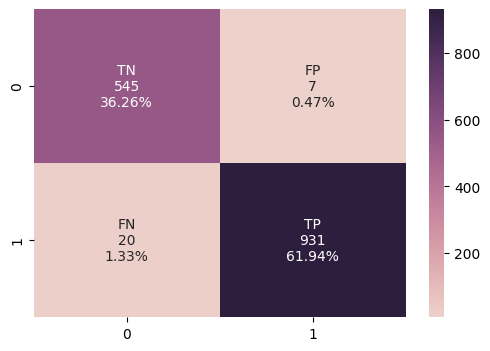

In [ ]:
# Prediction on the test set
Y_pred = nn_model.predict(X_test)
# Convert predicted probabilities to class labels (0 or 1)
Y_pred = (Y_pred > 0.5).astype(int)
# Report on test set
evaluate_model(Y_test, Y_pred, "Neural Network", save_in_df = True) 

#### **6.8] AdaBoost Classifier:**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an AdaBoost classifier with a decision tree as the base estimator
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm="SAMME.R",
    learning_rate=0.5)

# Train the classifier on the training data
ada_clf.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

Confusion Matrix:

Accuracy Score : 98.0%
Precision Score: 0.99
Recall Score: 0.98
F1 Score: 0.99
Error rate: 0.02

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       433
           1       0.99      0.98      0.99       769

    accuracy                           0.98      1202
   macro avg       0.98      0.98      0.98      1202
weighted avg       0.98      0.98      0.98      1202



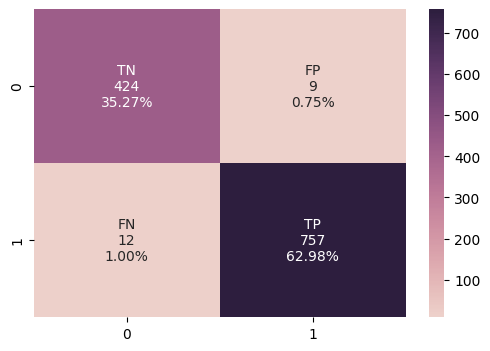

In [ ]:
# Prediction on the validation set
Y_val_pred = ada_clf.predict(X_valid)
#Report on validation set
evaluate_model(Y_valid, Y_val_pred)

Confusion Matrix:

Accuracy Score : 99.0%
Precision Score: 0.99
Recall Score: 0.99
F1 Score: 0.99
Error rate: 0.01

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       552
           1       0.99      0.99      0.99       951

    accuracy                           0.99      1503
   macro avg       0.99      0.99      0.99      1503
weighted avg       0.99      0.99      0.99      1503



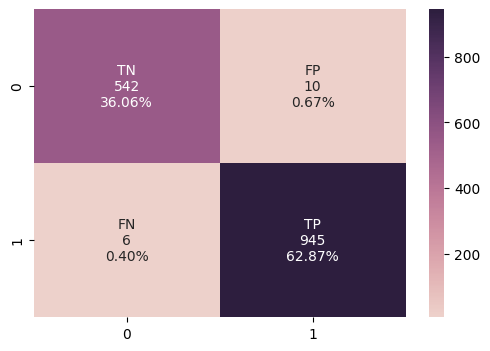

In [ ]:
# Prediction on the test set
Y_pred = ada_clf.predict(X_test)
# Report on test set
evaluate_model(Y_test, Y_pred, "AdaBoost Classifier", save_in_df = True) 

### ***7] Evaluation:***

In [ ]:
# Displaying the evaluation metrics dataframe for comparison 
eval_df

,Model,Accuracy,Precision,Recall,F1 Score,Error Rate
0,Logistic Regression,98.0,0.99,0.98,0.98,0.02
1,Support Vector Machine,98.0,0.99,0.98,0.98,0.02
2,Naïve Bayes,98.0,0.99,0.98,0.98,0.02
3,K-Nearest Neighbor,98.0,0.99,0.97,0.98,0.02
4,Decision Tree,97.0,0.97,0.98,0.98,0.03
5,Random Forest,98.0,0.98,0.99,0.99,0.02
6,Neural Network,98.0,0.99,0.98,0.99,0.02
7,AdaBoost Classifier,99.0,0.99,0.99,0.99,0.01


#### 7.1] **AUC-ROC**

47/47 [==============================] - 0s 2ms/step


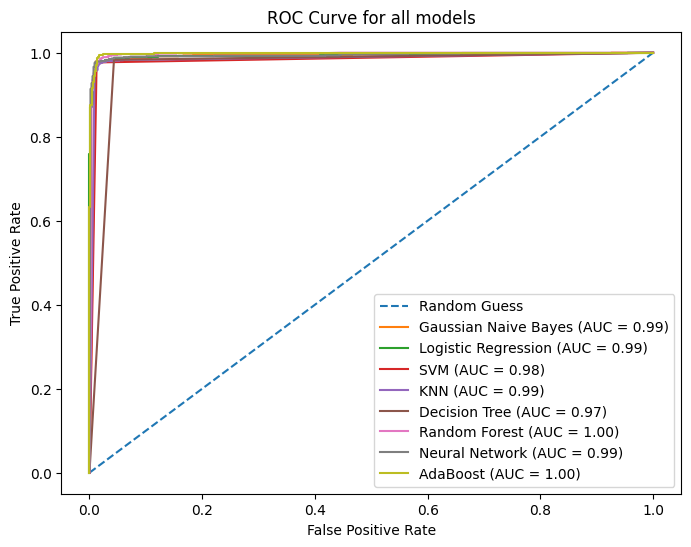

In [ ]:
from sklearn.metrics import roc_curve, auc

# Define a list of model names and their corresponding models
models = [('Gaussian Naive Bayes', gnb),
          ('Logistic Regression', grid_search_lr),
          ('SVM', grid_svm),
          ('KNN', grid_search_knn),
          ('Decision Tree', dtc),
          ('Random Forest', random_search),
          ('Neural Network', nn_model),
          ('AdaBoost', ada_clf)]

# Define a dictionary to store the fpr and tpr values for each model
roc_data = {}

# Calculate the fpr and tpr values for each model and store them in the dictionary
for name, model in models:
    try:
      fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
    except:
      fpr, tpr, _ = roc_curve(Y_test, model.predict(X_test))
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

# Dictionary to store model names and auc scores
model_auc_scores = {}
# Model names
model_names = list(roc_data.keys())
i = 0

# Plot the ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
for name, _ in models:
    fpr, tpr, roc_auc = roc_data[name]
    model_auc_scores[model_names[i]] = roc_auc
    i+=1
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all models')
plt.legend()
plt.show()

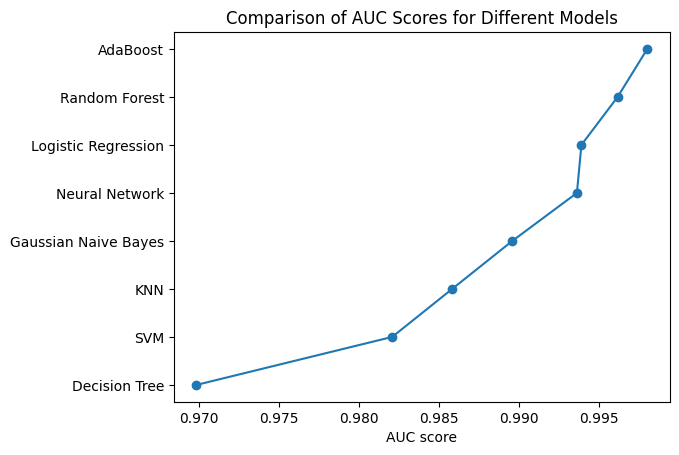

In [ ]:
# Sort the list by AUC score in descending order
sorted_scores = sorted(model_auc_scores.items(), key=lambda x: x[1])

# Extract model names and AUC scores
model_names = [x[0] for x in sorted_scores]
auc_scores = [x[1] for x in sorted_scores]

# Create a line graph
plt.plot(auc_scores, model_names, marker='o')

# Set y-axis labels as model names
plt.yticks(range(len(model_names)), model_names)

# Set x-axis label
plt.xlabel('AUC score')
plt.title('Comparison of AUC Scores for Different Models')

# Show the plot
plt.show()